Use the dataset: https://www.tensorflow.org/datasets/catalog/citrus_leaves 

Loading the dataset and splitting in train and test set

In [25]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
import tensorflow_datasets as tfds

(train, test), info = tfds.load('tf_flowers', split=['train[:70%]', 'train[70%:]'],  with_info=True, as_supervised=True)

image  label
0  [[[93, 122, 30], [90, 118, 31], [88, 118, 28],...      2
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
2  [[[96, 160, 208], [95, 159, 207], [96, 160, 20...      3
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      4
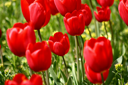
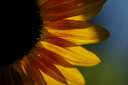
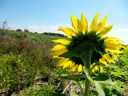
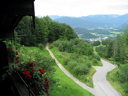

In [26]:
tfds.as_dataframe(train.take(4), info)

In [27]:
train_examples = 0

for example in train:
  train_examples += 1


In [28]:

# resizing images so that every image is of same size
def format_image(image, label):
    image = tf.image.resize(image, (224, 224))/255.0
    return image, label
    
train_batches = train.shuffle(train_examples//4).map(format_image).batch(32).prefetch(1)
test_batches = test.map(format_image).batch(32).prefetch(1)
print(train_batches)
print(validation_batches)

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>
<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>


Preprocess data

In [29]:
import tensorflow_hub as hub

In [30]:
ftr_ex = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape=(IMAGE_RES, IMAGE_RES, 3))

ftr_ex.trainable = False

CNN_model = tf.keras.Sequential([ftr_ex,tf.keras.layers.Dense(5)])

CNN_model.compile(optimizer='adam', metrics=['accuracy'])

fitted = model.fit(train_batches,epochs=5)

Epoch 1/5
81/81 [==============================] - 69s 843ms/step - loss: 0.1463 - accuracy: 0.9654
Epoch 2/5
81/81 [==============================] - 69s 848ms/step - loss: 0.1341 - accuracy: 0.9720
Epoch 3/5
81/81 [==============================] - 69s 847ms/step - loss: 0.1199 - accuracy: 0.9731
Epoch 4/5
81/81 [==============================] - 69s 849ms/step - loss: 0.1101 - accuracy: 0.9778
Epoch 5/5
81/81 [==============================] - 69s 851ms/step - loss: 0.1005 - accuracy: 0.9805


In [31]:
test_img, test_label = next(iter(train_batches))

test_img = test_img.numpy()
test_label = test_label.numpy()

predict = model.predict(test_img)
predict = tf.squeeze(predict).numpy()

predicted_ids = np.argmax(predict, axis=-1)

print("Predicted : ",class_names[predicted_ids])
print()
print("Actual : ",class_names[test_label])

Predicted :  ['daisy' 'tulips' 'tulips' 'roses' 'roses' 'tulips' 'daisy' 'daisy'
 'dandelion' 'tulips' 'sunflowers' 'sunflowers' 'sunflowers' 'dandelion'
 'roses' 'sunflowers' 'tulips' 'sunflowers' 'tulips' 'tulips' 'roses'
 'dandelion' 'dandelion' 'tulips' 'tulips' 'tulips' 'daisy' 'tulips'
 'dandelion' 'tulips' 'roses' 'tulips']

Actual :  ['roses' 'tulips' 'tulips' 'roses' 'roses' 'tulips' 'daisy' 'daisy'
 'dandelion' 'tulips' 'sunflowers' 'sunflowers' 'sunflowers' 'dandelion'
 'roses' 'sunflowers' 'tulips' 'sunflowers' 'tulips' 'tulips' 'roses'
 'dandelion' 'dandelion' 'tulips' 'tulips' 'tulips' 'daisy' 'tulips'
 'dandelion' 'tulips' 'roses' 'tulips']


Build CNN Model and comment on the results

The predicted Labels and Actual labels are same and hence we can conclude that CNN models are very accurate as compared to other algorithms


Challenges faced in training the model

1. Since the data is 3D it takes long time to execute each epoch 
2. Also, since the data is huge my PC ran out of memory and the code crashed so I had to use Google Colab GPU.

If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem? 

1. Use 16 bit floats instead of 32 bit floats 
2. Remove one or more layers 
3. Use distributed computing for CNN model to complete the training
4. Use small size of filters on the convolutional layer
5. Reduce dimensionality by taking one or more stride in one layer

What are the advantages of a CNN over a fully connected DNN for image classification? 

1. Automatically detects most important features the data without need of any human intervention
2. Accuracy of CNN is high as compared to the DNN
3. CNN performs parameter sharing and dimensionality reduction thus reducing computation time as well 